In [1]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
def gaussian(x, mu, sigma):
    n = len(mu)
    offset = x - mu
    det = linalg.det(sigma)
    inv = linalg.inv(sigma)
    scale = 1 / np.sqrt(((2 * np.pi) ** n) * det)
#     exp = -1 / 2 * (offset.T @ inv @ offset)
    exp = -1 / 2 * np.einsum("...k, kl, ...l -> ...", offset, inv, offset)
    return scale * np.exp(exp)

# 密度函数

## 标准一维正态分布

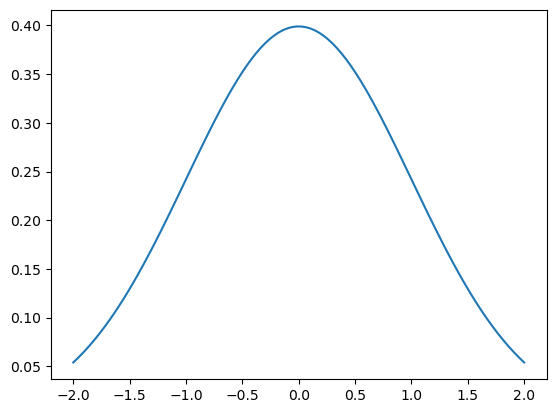

In [3]:
mu = np.array([0])
sigma = np.array([[1]])

xs = np.linspace(-2,2,100)[..., np.newaxis]
ys = gaussian(xs, mu, sigma)

plt.plot(xs, ys)
plt.show()

## 标准二维正态分布

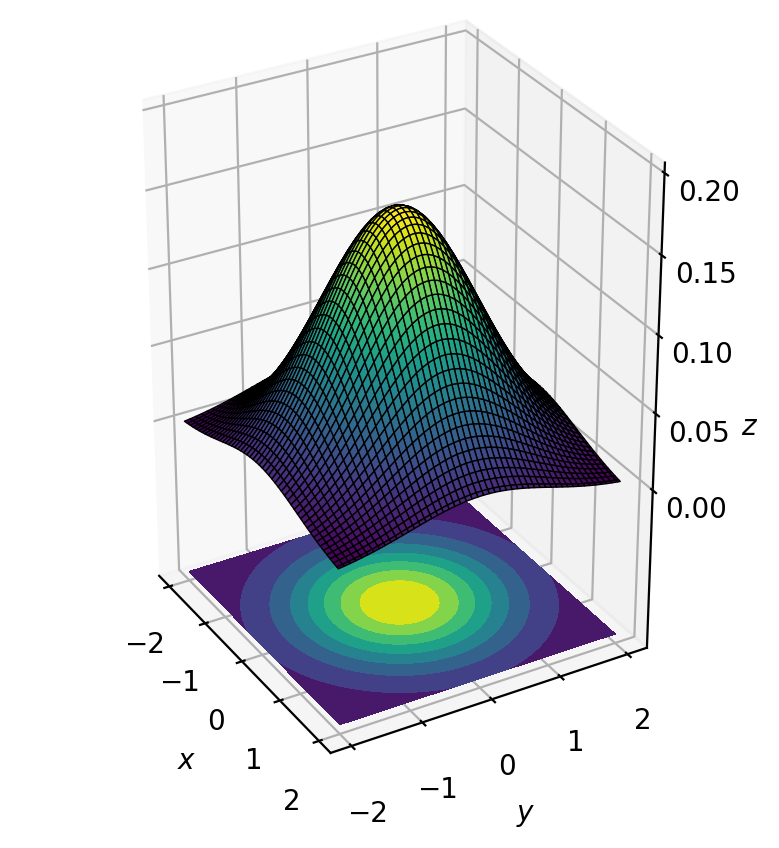

In [4]:
mu = np.array([0, 0])
sigma = np.array([[1,0],[0,1]])

xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Xs = np.concatenate((np.expand_dims(xx, -1), np.expand_dims(yy, -1)), axis=-1).reshape(-1,2)
Z = gaussian(Xs, mu, sigma).reshape(100, 100)

plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z, antialiased=True, cmap=cm.viridis, edgecolor='k', linewidth=.5)
ax.contourf(xx, yy, Z, zdir='z', offset=-0.1, cmap=cm.viridis)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim(-0.1,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.set_box_aspect(aspect=(1,1,1.5))
ax.view_init(30, -30)

plt.show()

## 二维正态分布Ⅰ

随机变量互相独立但方差不同，协方差矩阵$\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$。

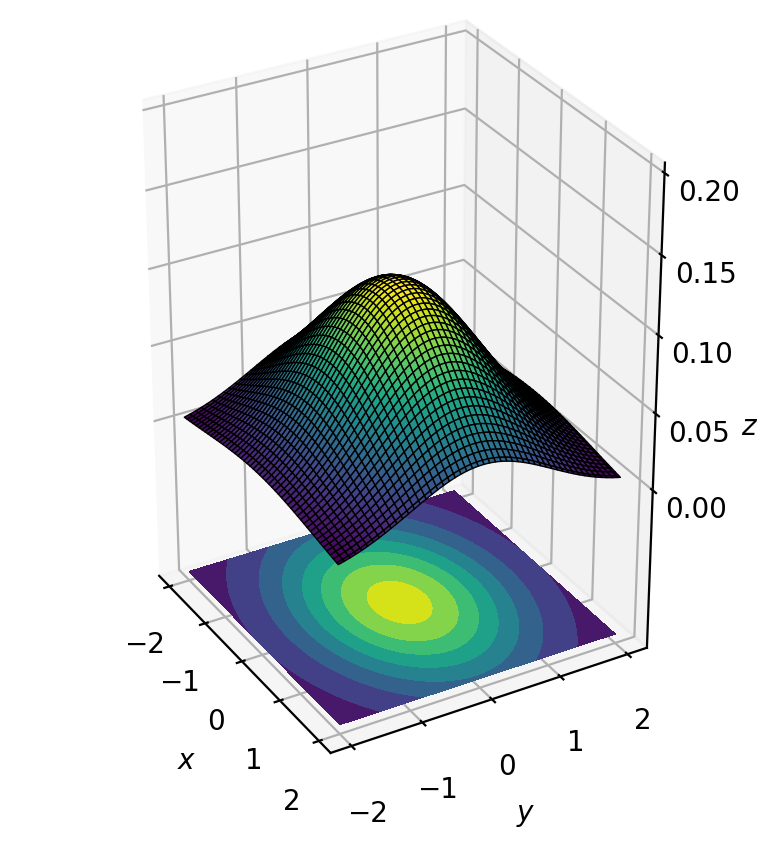

In [5]:
mu = np.array([0, 0])
sigma = np.array([[2,0],[0,1]])

xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Xs = np.concatenate((np.expand_dims(xx, -1), np.expand_dims(yy, -1)), axis=-1).reshape(-1,2)
Z = gaussian(Xs, mu, sigma).reshape(100, 100)

plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z, antialiased=True, cmap=cm.viridis, edgecolor='k', linewidth=.5)
ax.contourf(xx, yy, Z, zdir='z', offset=-0.1, cmap=cm.viridis)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim(-0.1,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.set_box_aspect(aspect=(1,1,1.5))
ax.view_init(30, -30)

plt.show()

## 二维正态分布Ⅱ

随机变量互相不独立，协方差矩阵$\Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$。

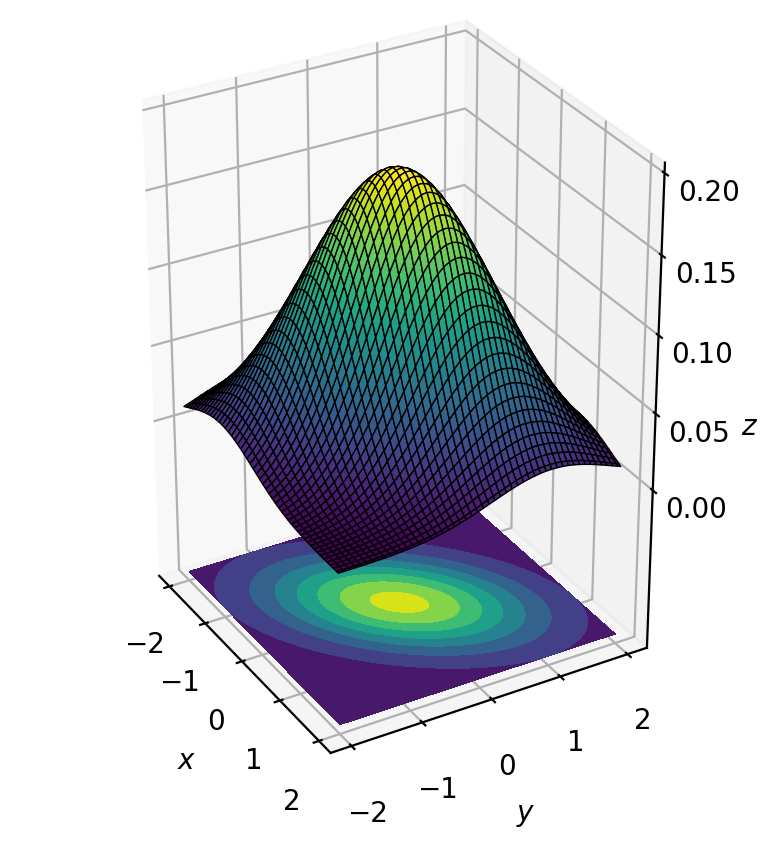

In [6]:
mu = np.array([0, 0])
sigma = np.array([[1,0.5],[0.5,1]])

xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Xs = np.concatenate((np.expand_dims(xx, -1), np.expand_dims(yy, -1)), axis=-1).reshape(-1,2)
Z = gaussian(Xs, mu, sigma).reshape(100, 100)

plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z, antialiased=True, cmap=cm.viridis, edgecolor='k', linewidth=.5)
ax.contourf(xx, yy, Z, zdir='z', offset=-0.1, cmap=cm.viridis)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim(-0.1,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.set_box_aspect(aspect=(1,1,1.5))
ax.view_init(30, -30)

plt.show()

# 采样

## 标准二维正态分布

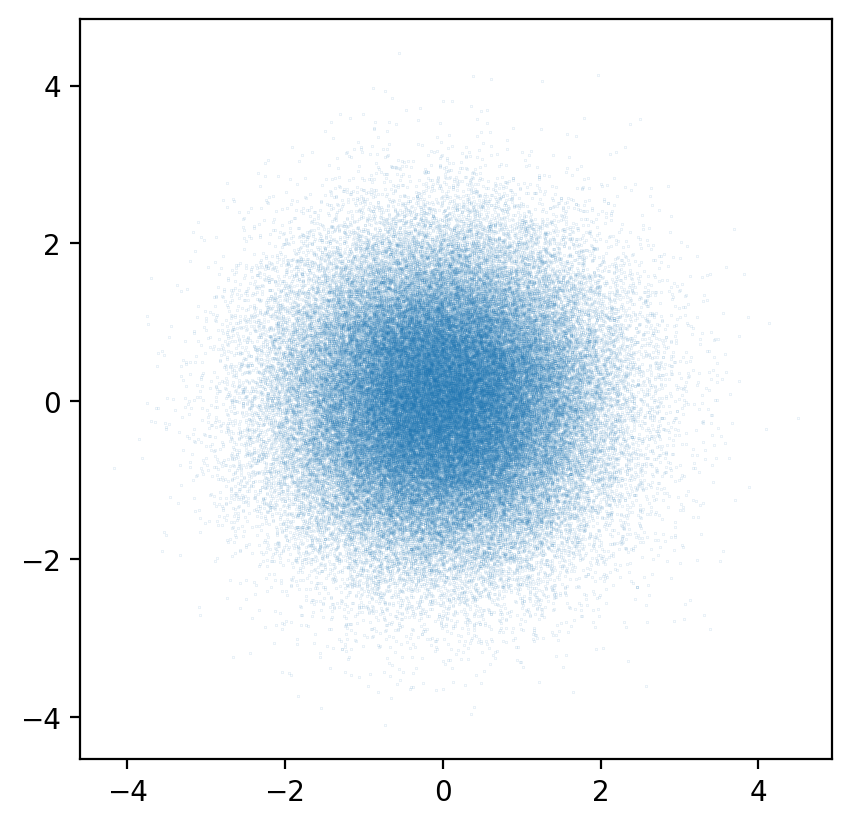

In [7]:
mu = np.array([0, 0])
sigma = np.array([[1,0],[0,1]])

data = np.random.multivariate_normal(mu, sigma, 100000)

plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(data[:, 0], data[:, 1], s=.001)
plt.show()

## 二维正态分布Ⅰ

协方差矩阵$\Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$。

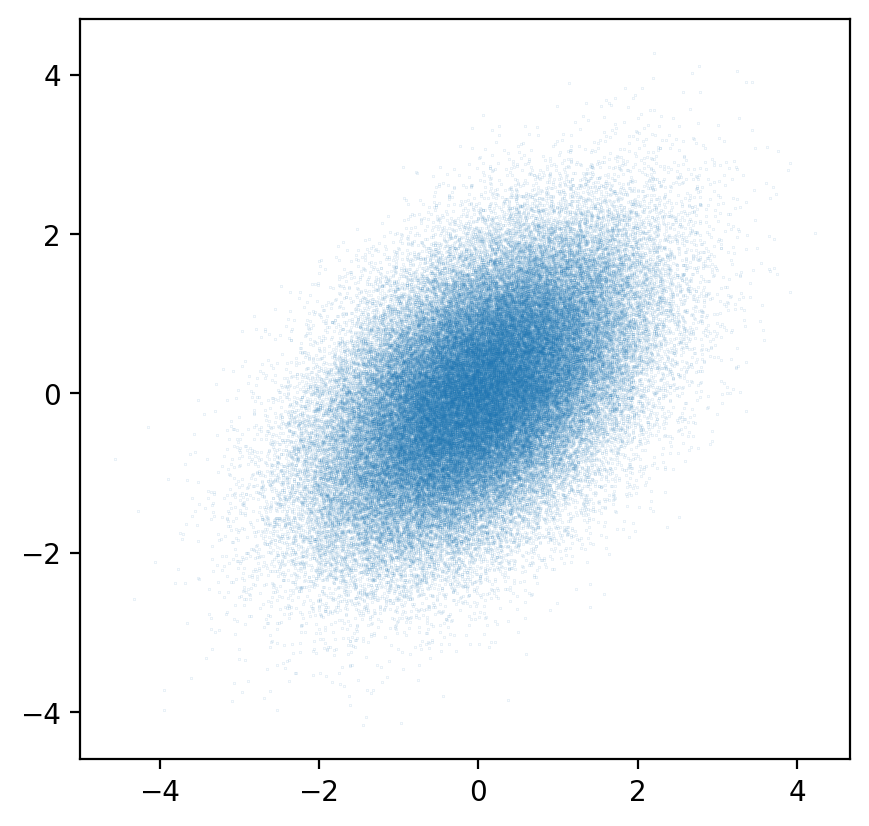

In [8]:
mu = np.array([0, 0])
sigma = np.array([[1,0.5],[0.5,1]])

data = np.random.multivariate_normal(mu, sigma, 100000)

plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(data[:, 0], data[:, 1], s=.001)
plt.show()

### 白化

原协方差矩阵$\Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$，新协方差矩阵变为$\Sigma' = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$。

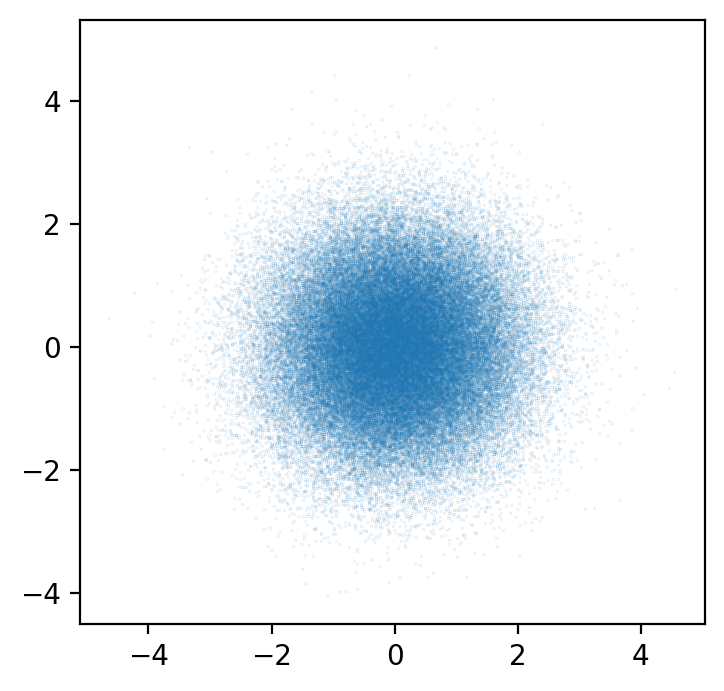

In [9]:
mu = np.array([0, 0])
sigma = np.array([[1,0.5],[0.5,1]])

data = np.random.multivariate_normal(mu, sigma, 100000)
w, v = linalg.eig(sigma)
data = (w ** -0.5) * (data @ v)

plt.figure(dpi=200)
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(data[:, 0], data[:, 1], s=.001)
plt.show()